# **Markowitz Efficient Frontier with python.**

## **Visualization.**

In [ ]:
#imoorting data from Yahoo Finance.
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
#importind standard libraries to visualize and manipulate data.
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

yf.pdr_override()

sns.set(style='whitegrid')

In [ ]:
tickers = ["CL=F", "UAL", "NVDA", "GC=F", "SAN", "WMT","PFI", "SEB"]
yData = yf.download(tickers, '2022-01-01', '2023-12-31', '1d');
data = yData["Adj Close"]


[*********************100%%**********************]  8 of 8 completed


* "CL=F": Represents the crude oil WTI futures contract
* "UAL": United Airlines Holdings, Inc.
* "NVDA": NVIDIA Corporation
* "GC=F": Represents the gold futures contract
* "SAN": Banco Santander
* "WMT": Walmart Inc
* "SEB": Seaboard Corporation, a diversified company with interests in agriculture, energy, and shipping.
* "PFI": Invesco DWA Financial Momentum ETF

In [ ]:
data.head()

Ticker,CL=F,GC=F,NVDA,PFI,SAN,SEB,UAL,WMT
Date,,,,,,,,
2022-01-03,76.080002,1799.400024,300.781036,51.773491,3.097312,3878.937256,45.490002,46.598579
2022-01-04,76.989998,1814.000000,292.482849,52.502827,3.161840,3832.389404,46.250000,45.744888
2022-01-05,77.849998,1824.599976,275.646881,50.986568,3.134186,3846.195068,45.779999,46.363411
2022-01-06,79.459999,1788.699951,281.378693,51.744698,3.263240,3879.185547,45.770000,46.234550
2022-01-07,78.900002,1797.000000,272.081940,51.399220,3.300113,3928.677246,47.310001,46.675888


**In the following code, we will normalize the data to facilitate the comparison between the stocks.**

In [ ]:
data = data *100 / data.iloc[0]
display(data)

Ticker,CL=F,GC=F,NVDA,PFI,SAN,SEB,UAL,WMT
Date,,,,,,,,
2022-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-01-04,101.196104,100.811380,97.241120,101.408705,102.083339,98.799984,101.670693,98.167989
2022-01-05,102.326494,101.400464,91.643703,98.480067,101.190487,99.155898,100.637496,99.495331
2022-01-06,104.442688,99.405353,93.549346,99.944386,105.357149,100.006401,100.615517,99.218798
2022-01-07,103.706624,99.866621,90.458475,99.277098,106.547628,101.282310,104.000878,100.165903
...,...,...,...,...,...,...,...,...
2023-12-22,96.687692,114.321444,162.336388,86.023271,134.309984,92.076423,93.537036,111.676006
2023-12-26,99.329650,114.382568,163.829114,86.774326,134.955704,92.076423,92.503848,111.504905
2023-12-27,97.410619,115.699671,164.287891,86.755059,135.278572,91.466615,91.734443,112.552873


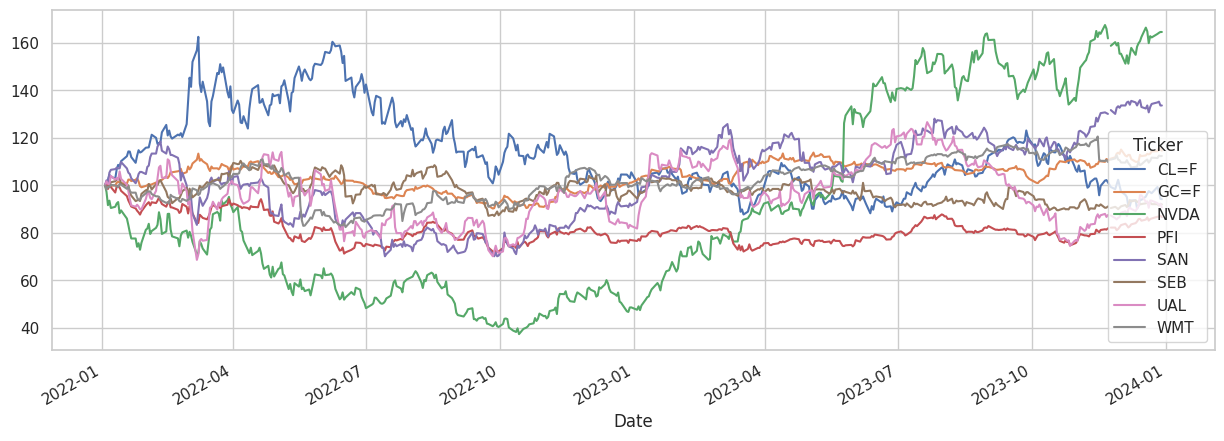

In [ ]:
data.plot(figsize = (15,5));

In [ ]:
data_chg = data.pct_change()
data_chg = data_chg.fillna(0)

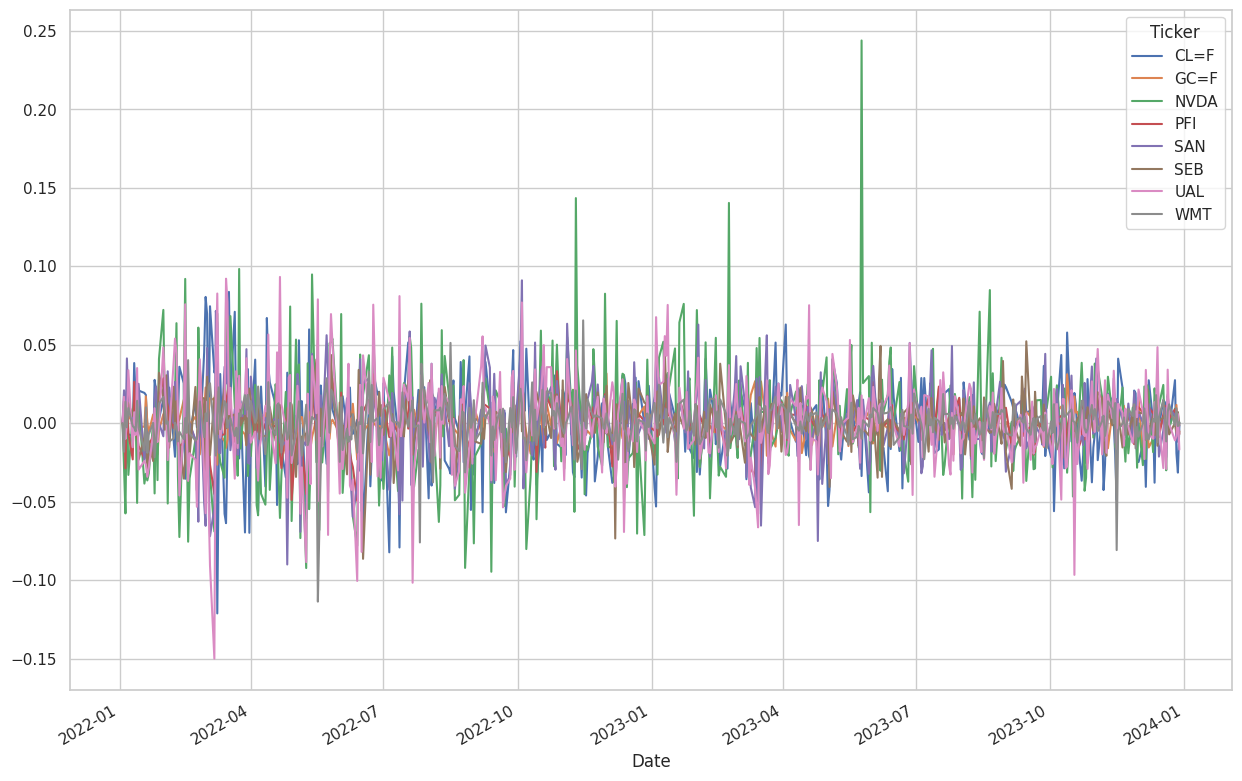

In [ ]:
data_chg.plot(figsize = (15,10));

In [ ]:
ret_acc = (data.iloc[-1] / data.iloc[0])-1
print("Accumulated return:\n", ret_acc)

Accumulated return:
 Ticker
CL=F   -0.058228
GC=F    0.146160
NVDA    0.646370
PFI    -0.133990
SAN     0.336643
SEB    -0.080240
UAL    -0.092988
WMT     0.123889
dtype: float64


In [ ]:
ret_aa = ((data.iloc[-1]/data.iloc[0])**(1/2))-1
print("Anualized return:\n", ret_aa)

Anualized return:
 Ticker
CL=F   -0.029551
GC=F    0.070589
NVDA    0.283109
PFI    -0.069403
SAN     0.156133
SEB    -0.040959
UAL    -0.047628
WMT     0.060136
dtype: float64


In [ ]:
vol_aa = data_chg.std()*np.sqrt(252)
print("Annualized volatility:\n", vol_aa)

Annualized volatility:
 Ticker
CL=F    0.415640
GC=F    0.143539
NVDA    0.564910
PFI     0.219592
SAN     0.367306
SEB     0.241979
UAL     0.461367
WMT     0.218609
dtype: float64


**Note, from the correlation matrix, that some components have negative correlation, meaning their combination is a good signal for portfolio composition as it minimizes volatility.**

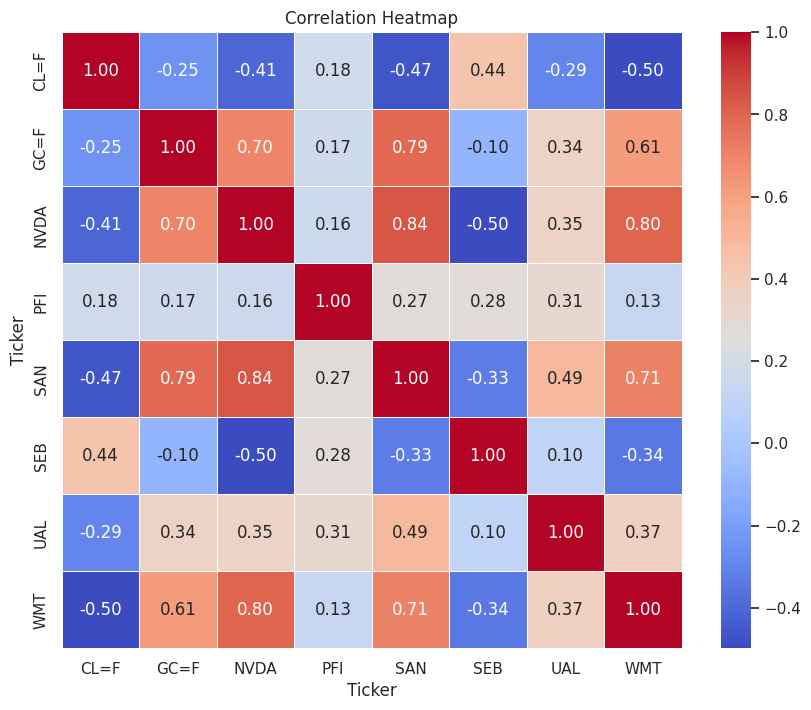

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Portfolio with two stocks: SAN and SEB**


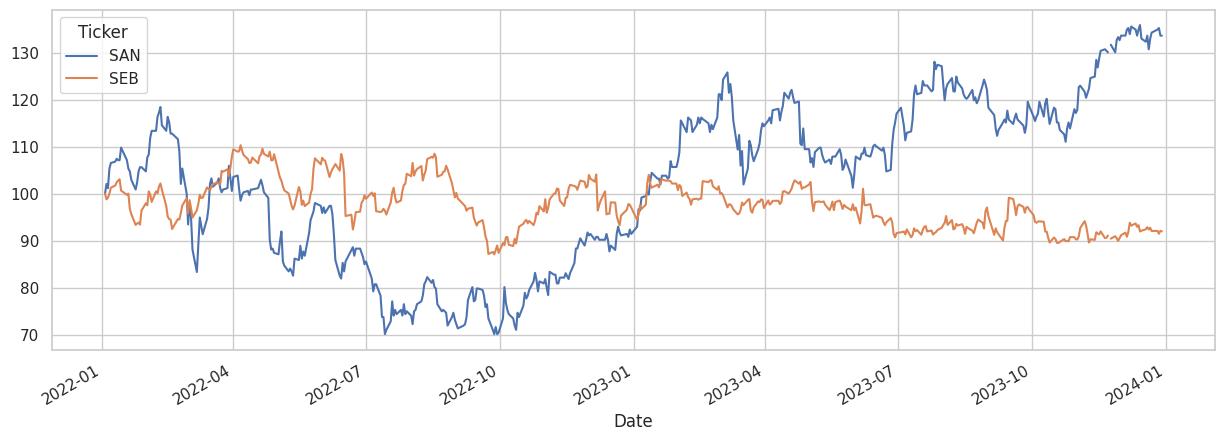

In [ ]:
data[['SAN', 'SEB']].plot(figsize = (15,5));

In [ ]:
def calc_ret_vol(ativos, ativos_chg, port_pesos):
  port = ativos.dot(port_pesos)
  port_chg =port.pct_change()
  port_chg = port_chg.fillna(0)
  ret = ((port.iloc[-1]/port.iloc[0])**(1/2))-1
  vol = port_chg.std()*np.sqrt(252)
  return ret, vol

In [ ]:
#Portfolio com os ativos: SAN e SEB

points = []
min_vol_ret = [100, 0] #[vol, ret]
port_pesos = [0, 0, 0, 0, 0, 0, 0, 0]
for w in range(0, 101, 1):
  ret, vol = calc_ret_vol(data, data_chg, [0, 0, 0, 0, w/100, (1-w/100), 0, 0])
  points.append([ret, vol])
  if vol < min_vol_ret[0]:
    min_vol_ret[0] = vol
    min_vol_ret[1] = ret
    port_pesos[4] = w/100
    port_pesos[5] = 1-w/100

print(port_pesos)

[0, 0, 0, 0, 0.29, 0.71, 0, 0]


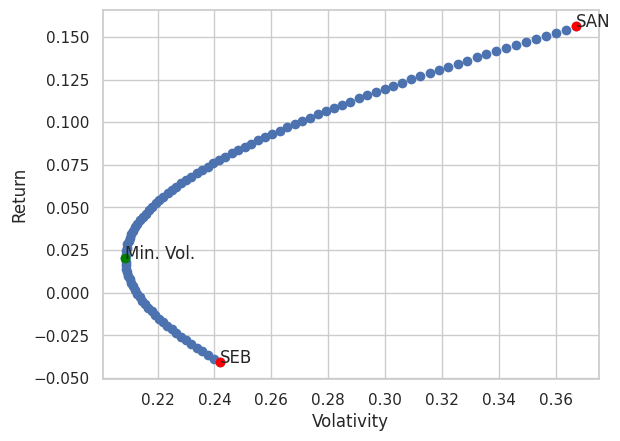

In [ ]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Return");
plt.xlabel("Volativity");

plt.scatter(vol_aa['SAN'], ret_aa['SAN'], color='red')
plt.text(vol_aa['SAN'], ret_aa['SAN'], 'SAN')

plt.scatter(vol_aa['SEB'], ret_aa['SEB'], color='red')
plt.text(vol_aa['SEB'], ret_aa['SEB'], 'SEB')

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

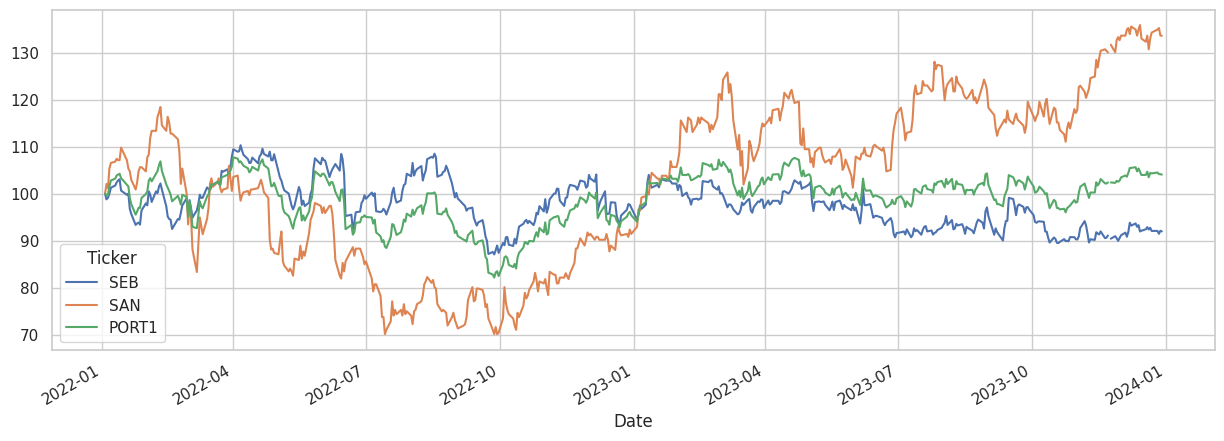

In [ ]:
port_pesos = [0, 0, 0, 0, 0.29, 0.71, 0, 0]
data['PORT1'] = data.dot(port_pesos)
data[['SEB', 'SAN', 'PORT1']].plot(figsize = (15,5));

In [ ]:
data_chg = data.pct_change()
data_chg = data_chg.fillna(0)

**Next, let's calculate the annualized return, accumulated return, and the volatility of the portfolio that follows the Markowitz frontier. This will make it possible to compare the results of the portfolio with each stock.**

In [ ]:
ret_acc = (data.iloc[data.count()[0]-1] / data.iloc[0]) - 1
print("Retorno acumulado:\n", ret_acc[['SEB', 'SAN', 'PORT1']])
ret_aa = ((data.iloc[-1]/data.iloc[0])**(1/2))-1
print("Retorno anual:\n", ret_aa[['SEB', 'SAN', 'PORT1']])
vol_aa = data_chg.std()*np.sqrt(252)
print("Volatilidade anual:\n", vol_aa[['SEB', 'SAN', 'PORT1']])

Retorno acumulado:
 Ticker
SEB     -0.080240
SAN      0.336643
PORT1    0.040656
dtype: float64
Retorno anual:
 Ticker
SEB     -0.040959
SAN      0.156133
PORT1    0.020125
dtype: float64
Volatilidade anual:
 Ticker
SEB      0.241979
SAN      0.367306
PORT1    0.208674
dtype: float64


In [ ]:
#Calcular drawdown
ddown = pd.DataFrame()

for ativo in data.columns:
  list = []
  for ind in range(data.count()[0]):
    list.append((data[ativo].iloc[ind]/data[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=data.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

CL=F    -46.046888
GC=F    -20.430368
NVDA    -62.701693
PFI     -29.757287
SAN     -40.820186
SEB     -21.072626
UAL     -41.156047
WMT     -25.739659
PORT1   -23.761787
dtype: float64


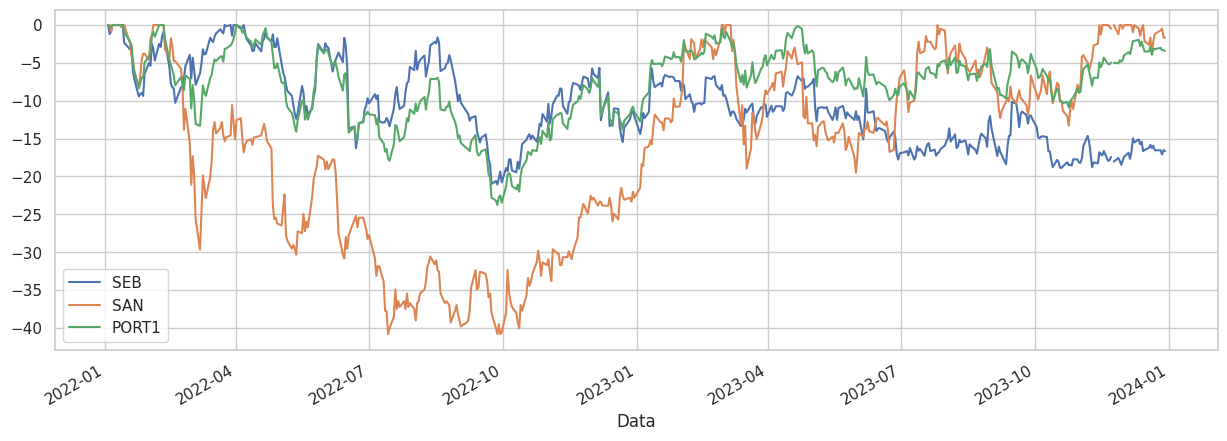

In [ ]:
ddown[['SEB', 'SAN', 'PORT1']].plot(figsize = (15,5));

In [ ]:
data = data.drop(["PORT1"], axis=1)

## **Portfolio with three stocks: SAN, SEB and WMT**

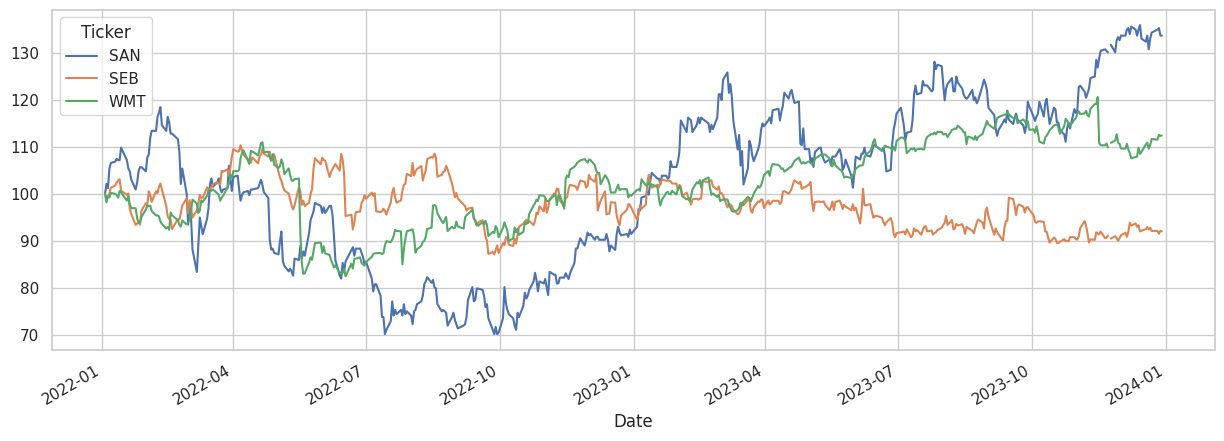

In [ ]:
data[['SAN', 'SEB',"WMT"]].plot(figsize = (15,5));

In [ ]:
points = []
min_vol_ret = [100, 0]
port_pesos = [0, 0, 0, 0, 0, 0, 0, 0]
for w1 in range(0, 101, 1):
  for w2 in range(0, 101-w1, 1):
    ret, vol = calc_ret_vol(data, data_chg, [0, 0, 0, 0, w2/100, w1/100, 0, (1-w1/100-w2/100)])
    points.append([ret, vol])
    if vol < min_vol_ret[0]:
      min_vol_ret[0] = vol
      min_vol_ret[1] = ret
      port_pesos[4] = w1/100
      port_pesos[5] = w2/100
      port_pesos[7] = 1-w1/100-w2/100

print(min_vol_ret)
print(port_pesos)

[0.16322139604982425, 0.03837991559141973]
[0, 0, 0, 0, 0.38, 0.15, 0, 0.47]


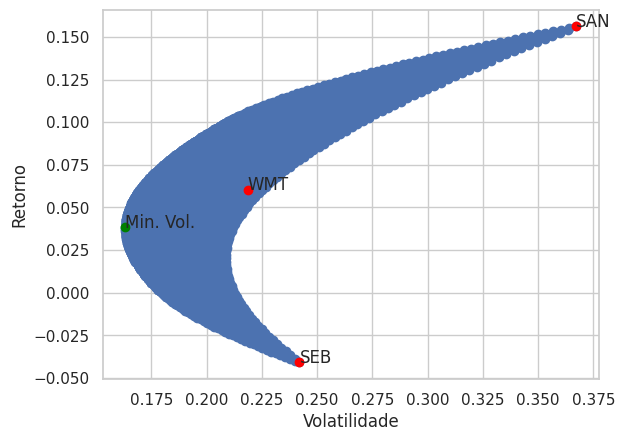

In [ ]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");

plt.scatter(vol_aa['SEB'], ret_aa['SEB'], color='red')
plt.text(vol_aa['SEB'], ret_aa['SEB'], 'SEB')

plt.scatter(vol_aa['SAN'], ret_aa['SAN'], color='red')
plt.text(vol_aa['SAN'], ret_aa['SAN'], 'SAN')

plt.scatter(vol_aa['WMT'], ret_aa['WMT'], color='red')
plt.text(vol_aa['WMT'], ret_aa['WMT'], 'WMT')

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

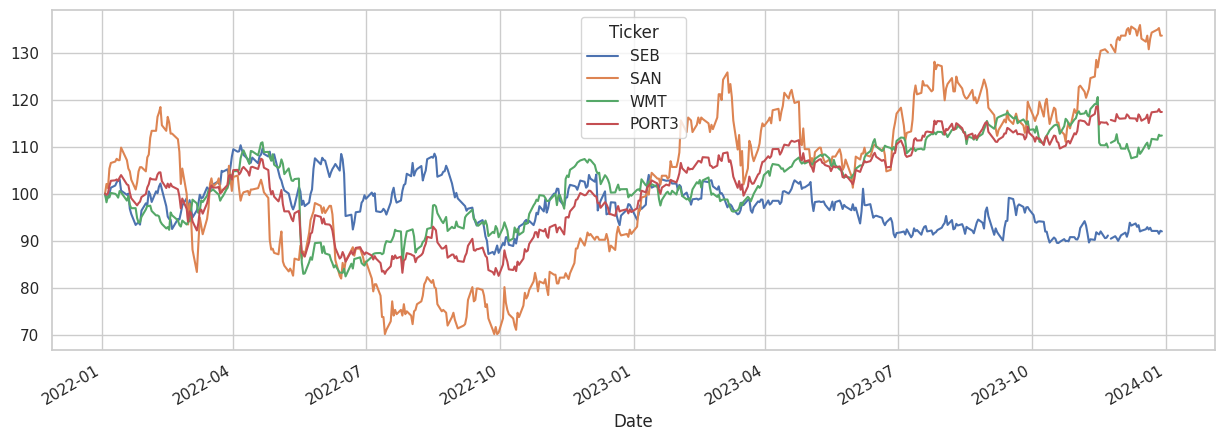

In [ ]:
port_pesos = [0, 0, 0, 0, 0.38, 0.15, 0, 0.47]
data['PORT3'] = data.dot(port_pesos)
data[['SEB', 'SAN', 'WMT', 'PORT3']].plot(figsize = (15,5));

In [ ]:
data_chg = data.pct_change()
data_chg = data_chg.fillna(0)

In [ ]:
ret_acc = (data.iloc[data.count()[0]-1] / data.iloc[0]) - 1
print("Retorno acumulado:\n", ret_acc[['SEB', 'SAN', 'WMT','PORT3']])
ret_aa = ((data.iloc[-1]/data.iloc[0])**(1/2))-1
print("Retorno anual:\n", ret_aa[['SEB', 'SAN', 'WMT','PORT3']])
vol_aa = data_chg.std()*np.sqrt(252)
print("Volatilidade anual:\n", vol_aa[['SEB', 'SAN','WMT', 'PORT3']])

Retorno acumulado:
 Ticker
SEB     -0.080240
SAN      0.336643
WMT      0.123889
PORT3    0.174116
dtype: float64
Retorno anual:
 Ticker
SEB     -0.040959
SAN      0.156133
WMT      0.060136
PORT3    0.083566
dtype: float64
Volatilidade anual:
 Ticker
SEB      0.241979
SAN      0.367306
WMT      0.218609
PORT3    0.190555
dtype: float64


In [ ]:
#Calcular drawdown (valor de queda de um ativo em comparação ao valor máximo de cotação anterior)
ddown = pd.DataFrame()

for ativo in data.columns:
  list = []
  for ind in range(data.count()[0]):
    list.append((data[ativo].iloc[ind]/data[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=data.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

CL=F    -46.046888
GC=F    -20.430368
NVDA    -62.701693
PFI     -29.757287
SAN     -40.820186
SEB     -21.072626
UAL     -41.156047
WMT     -25.739659
PORT3   -23.212314
dtype: float64


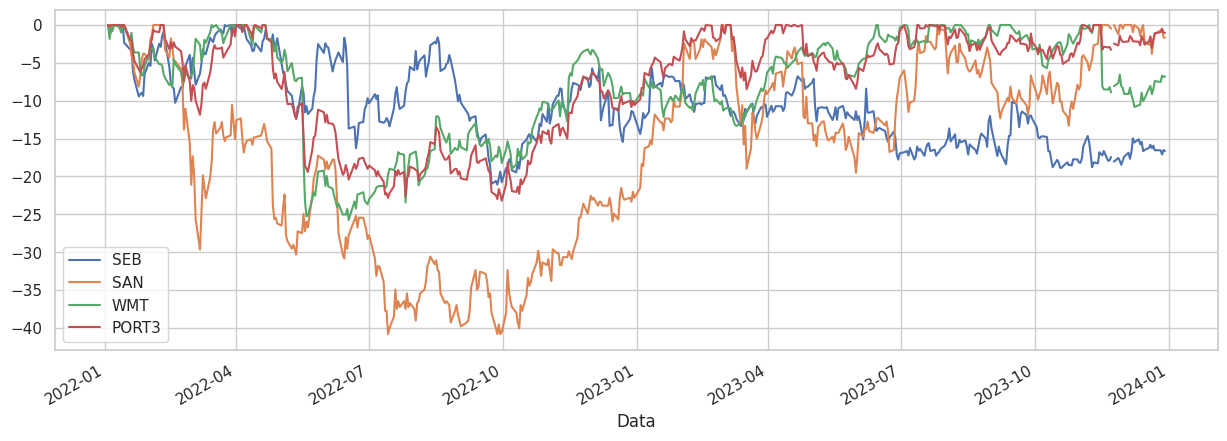

In [ ]:
ddown[['SEB', 'SAN','WMT', 'PORT3']].plot(figsize = (15,5));